# Homework 5 - R version

## Instructions

This assignment is due Monday, May 27 by 7pm. Please turn in a copy (either .pdf or .ipynb file) of this notebook as HW4 in Blackboard after you've completed it.

Some questions refer you to the [ISL textbook](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf). You may work with other students in the class to solve the problems but should write up your solutions separately.  Some textbook problem solutions are available on the internet.  You are welcome to look at these after attempting the problem yourself first, but please write up your solutions in your own words

## Conceptual Problems
Do problems 1 and 3 in Chapter 7.9  and problem 4 of Chapter 8.4 of ISL. You may either type your answers here or turn in a written copy to my mailbox near BH 170.

### Chapter 7.9 Problem 1

$f(x) = β_0 + β_1x + β_2x^2 + β_3x^3 + β_4(x − ξ)^3$

#### a. 
$a_1 = β_0, b_1 = β_1, c_1 = β_2, d_1 = β_3$

#### b. 
$f_2(x) = β_0 + β_1x + β_2x^2 + β_3x^3 + β_4(x − ξ)^3$
         
$     = β_0 + β_1x + β_2x^2 + β_3x^3 + β_4(x^3 - 3x^2ξ + 3xξ^2 − ξ^3)$
   
$     = β_0 + β_1x + β_2x^2 + β_3x^3 + β_4x^3 - 3β_4x^2ξ + 3β_4xξ^2 − β_4ξ^3$
   
$     = (β_0 − β_4ξ^3) + (β_1 + 3β_4ξ^2)x + (β_2 - 3β_4ξ)x^2 + (β_3 + β_4)x^3$
   
Thus, $a_2 = (β_0 − β_4ξ^3), b_2 = (β_1 + 3β_4ξ^2), c_2 = (β_2 - 3β_4ξ), d_2 = (β_3 + β_4)$
   
#### c. 
$f_1(ξ) = β_0 + β_1ξ + β_2ξ^2 + β_3ξ^3$
   
$f_2(ξ) = (β_0 − β_4ξ^3) + (β_1 + 3β_4ξ^2)ξ + (β_2 - 3β_4ξ)ξ^2 + (β_3 + β_4)ξ^3$

$       = (β_0 − β_4ξ^3) + (β_1ξ + 3β_4ξ^3) + (β_2ξ^2 - 3β_4ξ^3) + (β_3ξ^3 + β_4ξ^3)$

$       = β_0 + β_1ξ + β_2ξ^2 + (β_3 + β_4 − β_4 - 3β_4 + 3β_4)ξ^3$

$       = β_0 + β_1ξ + β_2ξ^2 + β_3ξ^3$

#### d.
$f′(x) = b_1 + 2c_1x + 3d_1x^2$

$f_1′(ξ) = β_1 + 2β_2ξ + 3β_3ξ^2$

$f_2′(ξ) = β_1 + 3β_4ξ^2 + 2(β_2−3β_4ξ)ξ + 3(β_3 + β_4)ξ^2$

$        = β_1 + 3β_4ξ^2 + 2β_2ξ − 6β_4ξ^2 + 3β_3ξ^2 + 3β_4ξ^2$

$        = β_1 + 2β_2ξ + (− 6β_4 + 3β_3 + 3β_4 + 3β_4)ξ^2$

$        = β_1 + 2β_2ξ + 3β_3ξ^2$

#### e.
$f′′(x) = 2c_1 + 6d_1x$

$f_1′′(ξ) = 2β_2 + 6β_3ξ$

$f_2′′(ξ) = 2(β_2 − 3β_4ξ) + 6(β_3 + β_4)ξ$

$         = 2β_2 − 6β_4ξ + 6β_3ξ + 6β_4ξ$

$         = 2β_2 + 6β_3ξ$

### Chapter 7.9 Problem 3

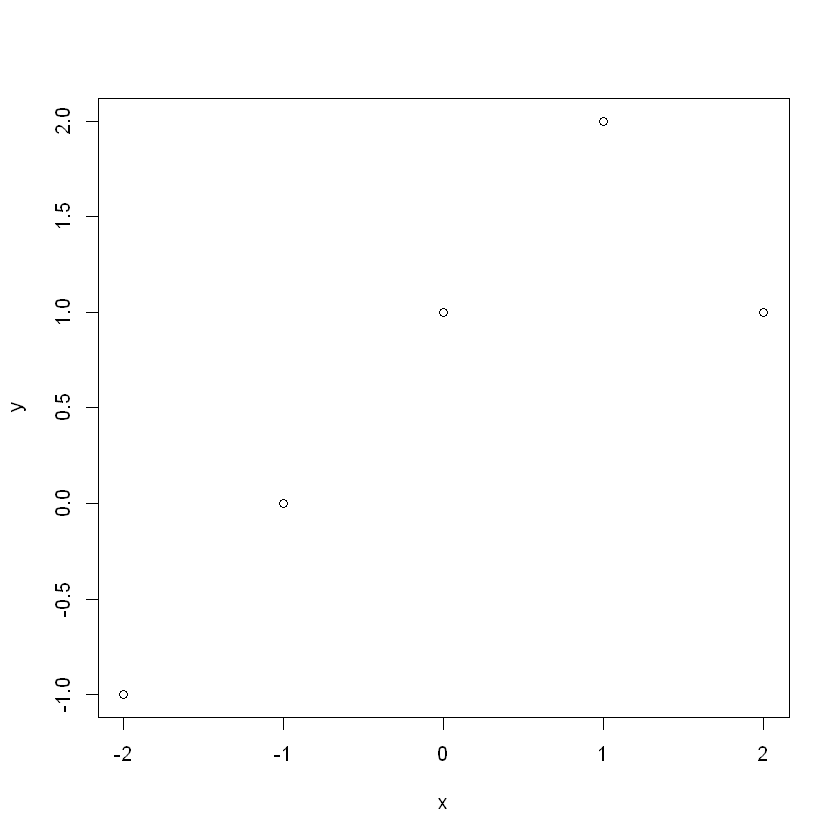

In [1]:
x = -2:2
y = 1 + x + -2 * (x-1)^2 * I(x >= 1)
plot(x, y)

# Exploring Penalized Splines via Simulation

Run the code below to simulate a training data set of n=41 observations of Y, given x in (0, 4) where $Y = x^4-3x^3-x^2+5x+3+\epsilon$ where $\epsilon$ is the irreducible error. We'll use splines to estimate $f(x) =  x^4-3x^3-x^2+5x+3$ shown in blue.

NULL

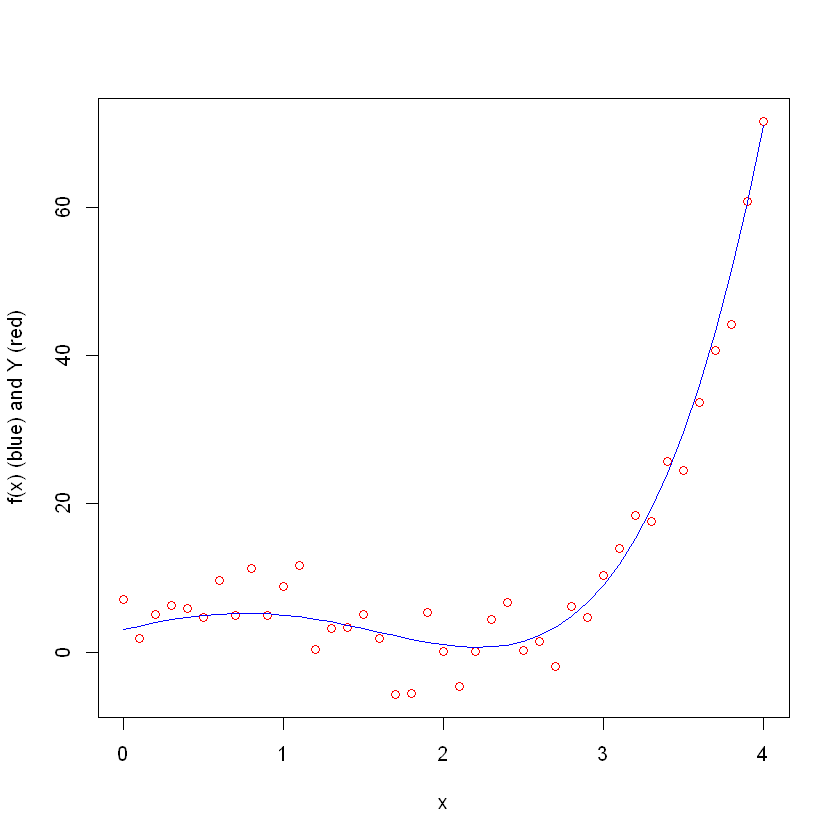

In [2]:
set.seed(42)  # get the random numbers

x = seq(0, 4, 0.1) # the predictor
dim(x)
epsilon = rnorm(length(x), 0, 3) # irreducible error
fx = x^4-3*x^3-x^2+5*x+3
Y = fx + epsilon

# view results

plot(x, Y, col="red", ylab='f(x) (blue) and Y (red)')
lines(x, fx, col="blue")


In [3]:
# cubic truncated power basis with K = 30 knots 

knots = seq(0, 4, length.out=30)


BB = cbind(1,x, x^2, x^3)
#BB = BB.T

for (i in 1:30) {
    BB = cbind(BB,max(0,(x-knots[i])^3))
}

The above code creates the cubic truncated power basis with 30 evenly space knots and stores it in matrix BB.  Write code below to compute $\beta = (BB^TBB+\lambda I)^{-1}BB^T Y$, the ridge regression solution to minimizing the mean squared training error with the squared coefficients penalized, with your choice of $\lambda$. Then compute $\hat{y} = BB \beta$.  Plot the true $f(x)$ together with your estimate.  Try a few other choices for $\lambda$, and choose the one that visually gives the best estimate.

In [ ]:
beta = solve(t(BB) %*% BB + 5I), t(BB) %*% Y)

# Problem 8.4.9

Read the lab in section 8.3 of ISL.  

Write code to answers problem 9 in Chapter 8.4 of ISL

In [4]:
if( ! require("ISLR") ){ install.packages("ISLR");}
if( ! require("tree") ){ install.packages("tree");}

Loading required package: ISLR
Loading required package: tree


#### a.

In [5]:
library(ISLR)
attach(OJ)
set.seed(800)

train = sample(dim(OJ)[1], 800)
OJ.train = OJ[train, ]
OJ.test = OJ[-train, ]

#### b.

In [6]:
library(tree)
oj.tree = tree(Purchase ~ ., data = OJ.train)
summary(oj.tree)


Classification tree:
tree(formula = Purchase ~ ., data = OJ.train)
Variables actually used in tree construction:
[1] "LoyalCH"       "SalePriceMM"   "PriceDiff"     "ListPriceDiff"
Number of terminal nodes:  7 
Residual mean deviance:  0.77 = 610.6 / 793 
Misclassification error rate: 0.1625 = 130 / 800 

The training error rate is 0.1625. It has 7 terminal nodes

#### c.

In [7]:
oj.tree

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

 1) root 800 1073.00 CH ( 0.60625 0.39375 )  
   2) LoyalCH < 0.48285 299  315.60 MM ( 0.22074 0.77926 )  
     4) LoyalCH < 0.051325 59   10.14 MM ( 0.01695 0.98305 ) *
     5) LoyalCH > 0.051325 240  280.40 MM ( 0.27083 0.72917 )  
      10) SalePriceMM < 2.04 133  122.50 MM ( 0.17293 0.82707 ) *
      11) SalePriceMM > 2.04 107  143.40 MM ( 0.39252 0.60748 ) *
   3) LoyalCH > 0.48285 501  446.60 CH ( 0.83633 0.16367 )  
     6) LoyalCH < 0.764572 239  289.10 CH ( 0.70711 0.29289 )  
      12) PriceDiff < -0.165 38   43.80 MM ( 0.26316 0.73684 ) *
      13) PriceDiff > -0.165 201  206.10 CH ( 0.79104 0.20896 )  
        26) ListPriceDiff < 0.255 95  118.50 CH ( 0.68421 0.31579 ) *
        27) ListPriceDiff > 0.255 106   74.87 CH ( 0.88679 0.11321 ) *
     7) LoyalCH > 0.764572 262   97.44 CH ( 0.95420 0.04580 ) *

I pick "3)". The splitting variable is "LoyalCH". The splitting value is 0.48285. There are 501 points in the subtree below this node. The deviance for all points contained in region below is 446.60. The prediction at this node is Sales = CH. About 84% points have CH as value of Sales and remaining 16% points have MM as value of Sales.

#### d.

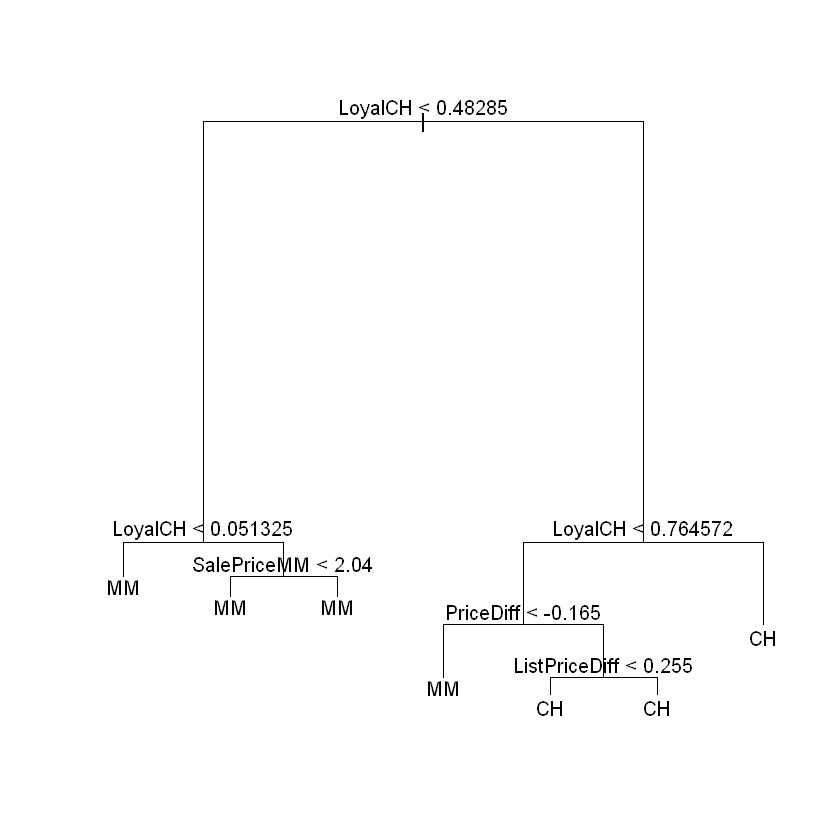

In [8]:
plot(oj.tree)
text(oj.tree, pretty = 0)

“LoyalCH” is the most important variable of the tree. The top three nodes all contain LoyalCH. If LoyalCH < 0.051325, the tree predicts MM. If LoyalCH < 0.764572, the tree predicts CH. If LoyalCH < 0.764572, the decision also depends on the variable "PriceDiff"

#### e.

In [9]:
oj.pred = predict(oj.tree, OJ.test, type = "class")
table(OJ.test$Purchase, oj.pred)

    oj.pred
      CH  MM
  CH 138  30
  MM  22  80

#### f.

In [10]:
cv.oj = cv.tree(oj.tree, FUN = prune.tree)

#### g.

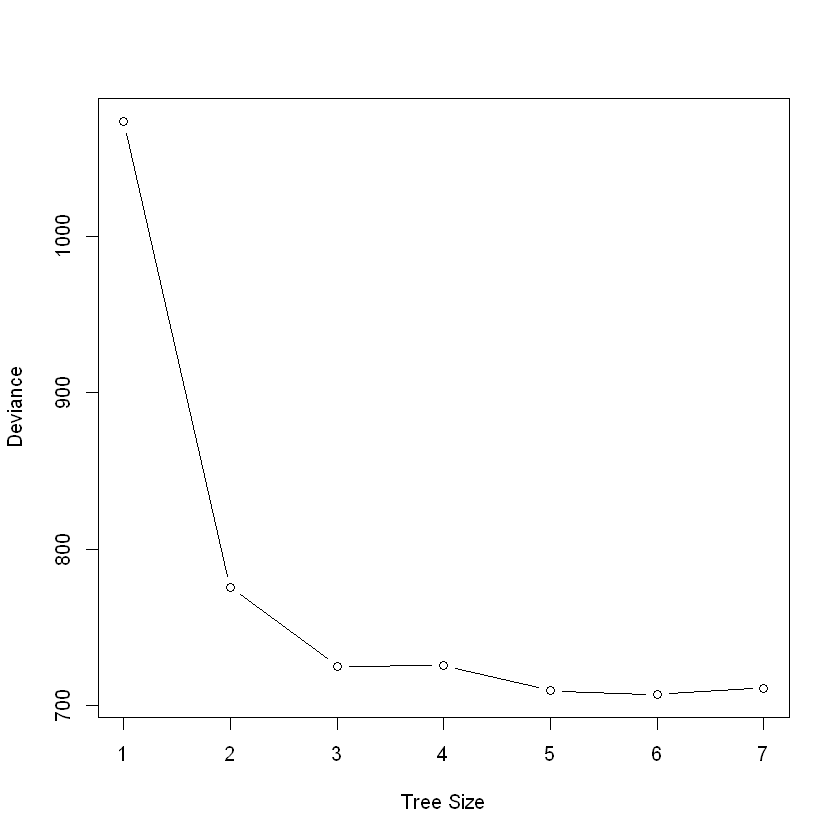

In [11]:
plot(cv.oj$size, cv.oj$dev, type = "b", xlab = "Tree Size", ylab = "Deviance")

#### h.

Tree size 6 gives the lowest cross-validation error.

#### i.

In [12]:
oj.pruned = prune.tree(oj.tree, best = 6)

#### j.

In [13]:
summary(oj.pruned)


Classification tree:
snip.tree(tree = oj.tree, nodes = 13L)
Variables actually used in tree construction:
[1] "LoyalCH"     "SalePriceMM" "PriceDiff"  
Number of terminal nodes:  6 
Residual mean deviance:  0.785 = 623.3 / 794 
Misclassification error rate: 0.1625 = 130 / 800 

Misclassification error rate is exactly the same as the original tree, which is 0.1625.

#### k.

In [14]:
pred.unpruned = predict(oj.tree, OJ.test, type = "class")
misclass.unpruned = sum(OJ.test$Purchase != pred.unpruned)
misclass.unpruned/length(pred.unpruned)

[1] 0.1925926

In [15]:
pred.pruned = predict(oj.pruned, OJ.test, type = "class")
misclass.pruned = sum(OJ.test$Purchase != pred.pruned)
misclass.pruned/length(pred.pruned)

[1] 0.1925926

In [ ]:
The unpruned and pruned tree have the same test error rate of 0.1926.